# Pandas Aula 4

## Apply, applymap, map

In [17]:
import pandas as pd
df = pd.DataFrame({'A': [1, 2, 3, 4],
                   'B': [10, 20, 30, 40],
                   'C': [20, 40, 60, 80]
                   },
                  index=['Linha 1', 'Linha 2', 'Linha 3', 'Linha 4'])

In [18]:
df

,A,B,C
Linha 1,1,10,20
Linha 2,2,20,40
Linha 3,3,30,60
Linha 4,4,40,80


O `apply` é usado para aplicar uma função ao longo de um eixo do Dataframe ou em valores de Série

In [19]:
def custom_sum(row):
    return row.sum()


df['D'] = df.apply(custom_sum, axis=1) # ou df['D'] = df.apply(lambda row: row.sum(), axis=1) # apply em um dataframe

In [20]:
df

,A,B,C,D
Linha 1,1,10,20,31
Linha 2,2,20,40,62
Linha 3,3,30,60,93
Linha 4,4,40,80,124


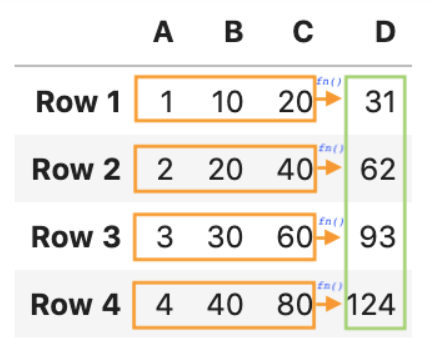

In [21]:
df.loc['Linha 5'] = df.apply(custom_sum, axis=0)
df

,A,B,C,D
Linha 1,1,10,20,31
Linha 2,2,20,40,62
Linha 3,3,30,60,93
Linha 4,4,40,80,124
Linha 5,10,100,200,310


In [12]:
def multiply_by_2(val):
    return val * 2


df['E'] = df['C'].apply(multiply_by_2) # apply sobre uma série df['E'] = df['C'].apply(lambda x: x * 2)

In [13]:
df

,A,B,C,D,E
Linha 1,1,10,20,62,40
Linha 2,2,20,40,124,80
Linha 3,3,30,60,186,120
Linha 4,4,40,80,248,160


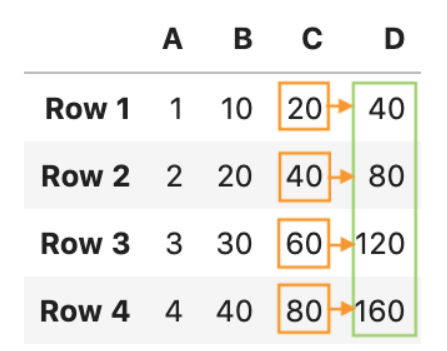

O `applymap` só está disponível no Dataframe e é usado para operações de elemento a elemento em todo o DataFrame

In [24]:
df.applymap(np.square)

,A,B,C,D
Linha 1,1,100,400,961
Linha 2,4,400,1600,3844
Linha 3,9,900,3600,8649
Linha 4,16,1600,6400,15376
Linha 5,100,10000,40000,96100


O `map` só está disponível e, séries e é usado para substituir cada valor em uma série por outro valor

In [26]:
s = pd.Series (['gato', 'cachorro', np.nan, 'coelho']) 
s

0        gato
1    cachorro
2         NaN
3      coelho
dtype: object

In [30]:
s.map({'gato': 'gatinho', 'cachorro':'cachorrinho', 'coelho':'coelhinho'})

0        gatinho
1    cachorrinho
2         aranha
3      coelhinho
dtype: object

In [33]:
s.map('Eu sou um {}'.format, na_action='ignore')

0        Eu sou um gato
1    Eu sou um cachorro
2                   NaN
3      Eu sou um coelho
dtype: object

----

In [36]:
## Dataframe com linhas do tipo objeto (string)

In [37]:
df = pd.DataFrame({'email': ['jose@email.com', 'joao@email.com', 'maria@email.com', 'joana@email.com'],
                   'nome': ['Jose', 'Joao', 'Maria', 'Joana'],
                   'idade': [20, 40, 60, 30],
                   'telefone': ['99999-1111', '99999-2222','99999-3333','99999-4444']
                   })

In [38]:
df

,email,nome,idade,telefone
0,jose@email.com,Jose,20,99999-1111
1,joao@email.com,Joao,40,99999-2222
2,maria@email.com,Maria,60,99999-3333
3,joana@email.com,Joana,30,99999-4444


In [46]:
df['nome_upper'] = df['nome'].str.upper()

In [43]:
df

,email,nome,idade,telefone,nome_upper
0,jose@email.com,Jose,20,99999-1111,JOSE
1,joao@email.com,Joao,40,99999-2222,JOAO
2,maria@email.com,Maria,60,99999-3333,MARIA
3,joana@email.com,Joana,30,99999-4444,JOANA


In [41]:
df['nome'].str.lower()

0     jose
1     joao
2    maria
3    joana
Name: nome, dtype: object

In [48]:
df['qt_caracters_nome'] = df['nome'].str.len()

In [49]:
df

,email,nome,idade,telefone,nome_upper,qt_caracters_nome
0,jose@email.com,Jose,20,99999-1111,JOSE,4
1,joao@email.com,Joao,40,99999-2222,JOAO,4
2,maria@email.com,Maria,60,99999-3333,MARIA,5
3,joana@email.com,Joana,30,99999-4444,JOANA,5


In [53]:
# trocar maria por mariana
df['nome_upper'] = df['nome_upper'].str.replace('MARIA','MARIANA')

In [54]:
df

,email,nome,idade,telefone,nome_upper,qt_caracters_nome
0,jose@email.com,Jose,20,99999-1111,JOSE,4
1,joao@email.com,Joao,40,99999-2222,JOAO,4
2,maria@email.com,Maria,60,99999-3333,MARIANA,5
3,joana@email.com,Joana,30,99999-4444,JOANA,5


In [ ]:
df['telefone'].str.strip() # elemina os espaços em excesso

In [56]:
df['nome'].str[0:2] # acessar os caracteres das strings da coluna nome

0    Jo
1    Jo
2    Ma
3    Jo
Name: nome, dtype: object

In [59]:
df['telefone'].str[-4:]

0    1111
1    2222
2    3333
3    4444
Name: telefone, dtype: object

In [66]:
# a coluna telefone é strong/objeto
df['telefone']

0    99999-1111
1    99999-2222
2    99999-3333
3    99999-4444
Name: telefone, dtype: object

In [61]:
# tentando transformar a coluna em numérica
pd.to_numeric(df['telefone'])

ValueError: Unable to parse string "99999-1111" at position 0

In [62]:
# exemplo1
df['telefone'].str.split('-')

0    [99999, 1111]
1    [99999, 2222]
2    [99999, 3333]
3    [99999, 4444]
Name: telefone, dtype: object

In [63]:
# exemplo1
df['telefone'].str.split('-', expand=True)

,0,1
0,99999,1111
1,99999,2222
2,99999,3333
3,99999,4444


In [65]:
# exemplo1
df['telefone'].str.split('-').str.get(1)

0    1111
1    2222
2    3333
3    4444
Name: telefone, dtype: object

In [68]:
#exemplo2
df['telefone_ajust'] = df['telefone'].str.replace('-','')

In [69]:
df['telefone_ajust'] 

0    999991111
1    999992222
2    999993333
3    999994444
Name: telefone_ajust, dtype: object

In [70]:
pd.to_numeric(df['telefone_ajust']) # ou df['telefone_ajust'].astype('int') 

0    999991111
1    999992222
2    999993333
3    999994444
Name: telefone_ajust, dtype: int64

In [72]:
df

,email,nome,idade,telefone,nome_upper,qt_caracters_nome,telefone_ajust
0,jose@email.com,Jose,20,99999-1111,JOSE,4,999991111
1,joao@email.com,Joao,40,99999-2222,JOAO,4,999992222
2,maria@email.com,Maria,60,99999-3333,MARIANA,5,999993333
3,joana@email.com,Joana,30,99999-4444,JOANA,5,999994444


In [75]:
df[['nomedoemail','dominiodoemail']] =df['email'].str.split('@', expand=True)

In [76]:
df

,email,nome,idade,telefone,nome_upper,qt_caracters_nome,telefone_ajust,nomedoemail,dominiodoemail
0,jose@email.com,Jose,20,99999-1111,JOSE,4,999991111,jose,email.com
1,joao@email.com,Joao,40,99999-2222,JOAO,4,999992222,joao,email.com
2,maria@email.com,Maria,60,99999-3333,MARIANA,5,999993333,maria,email.com
3,joana@email.com,Joana,30,99999-4444,JOANA,5,999994444,joana,email.com


## TITANIC - DATASET

https://www.kaggle.com/c/titanic/data

| Variable | Definition                                 | Key                                            |
|----------|--------------------------------------------|------------------------------------------------|
| survival | Survival                                   | 0 = No, 1 = Yes                                |
| pclass   | Ticket class                               | 1 = 1st, 2 = 2nd, 3 = 3rd                      |
| sex      | Sex                                        |                                                |
| Age      | Age in years                               |                                                |
| sibsp    | # of siblings / spouses aboard the Titanic |                                                |
| parch    | # of parents / children aboard the Titanic |                                                |
| ticket   | Ticket number                              |                                                |
| fare     | Passenger fare                             |                                                |
| cabin    | Cabin number                               |                                                |
| embarked | Port of Embarkation                        | C = Cherbourg, Q = Queenstown, S = Southampton |

**Variable Notes**  
pclass: A proxy for socio-economic status (SES)  
1st = Upper  
2nd = Middle  
3rd = Lower  

age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

sibsp: The dataset defines family relations in this way...  
Sibling = brother, sister, stepbrother, stepsister  
Spouse = husband, wife (mistresses and fiancés were ignored)  

parch: The dataset defines family relations in this way...  
Parent = mother, father  
Child = daughter, son, stepdaughter, stepson  
Some children travelled only with a nanny, therefore parch=0 for them  

In [78]:
# carregar o arquivo  DATASET titanic.csv

# ou carregar direto do link

df = pd.read_csv('https://github.com/renatapink/DSdegree/raw/master/Modulo2/Aula07/titanic.csv')

In [79]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


### Dados faltantes

<AxesSubplot:>

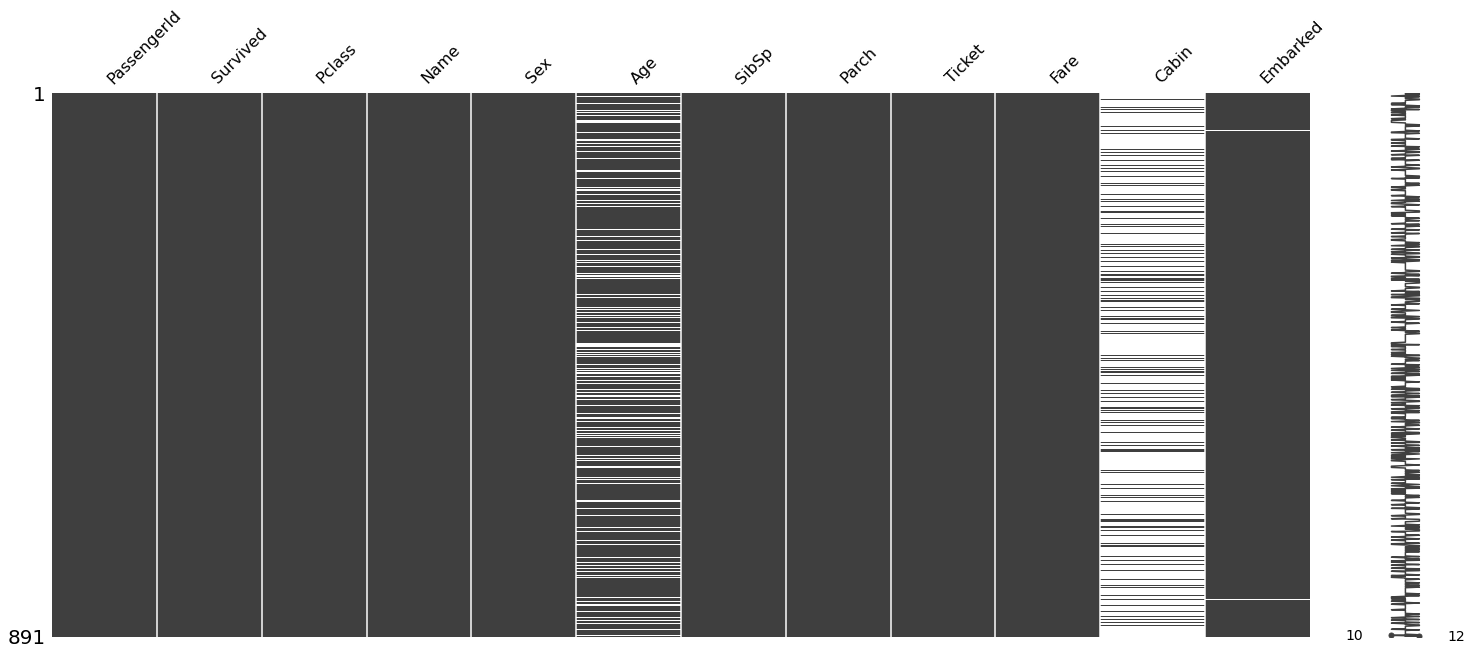

In [82]:
import missingno as msno
msno.matrix(df)

### Inspecionar o dataframe

In [84]:
df.shape

(891, 12)

In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### Analisar cada uma das colunas

In [87]:
df['Pclass'].unique() # mostra valores únicos da coluna

array([3, 1, 2], dtype=int64)

In [88]:
df['Pclass'].unique().tolist() # transformando em lista

[3, 1, 2]

In [89]:
df['Pclass'].nunique() # quantidade de valores únicos

3

In [90]:
df['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [93]:
df['Pclass'].value_counts(normalize=True)

3    0.551066
1    0.242424
2    0.206510
Name: Pclass, dtype: float64

In [91]:
# agrupar a classe com a sobrevivênvia - quero saber quantas pessoas de cada classe sobreviveu
df.groupby(['Pclass'])['Survived'].sum()

Pclass
1    136
2     87
3    119
Name: Survived, dtype: int64

In [95]:
df.groupby(['Pclass'])[['Survived']].sum()

,Survived
Pclass,
1,136
2,87
3,119


In [107]:
df1 = df.groupby(['Pclass']).agg({'Survived':['sum','count']}) # agregar
df1

Survived      
            sum count
Pclass               
1           136   216
2            87   184
3           119   491

In [108]:
# diminuindo o level (nível) do index
df1.columns =  ['_'.join(col) for col in df1.columns]

In [110]:
# multiindex
df1 = df1.reset_index()

In [115]:
df1['porcentagem_sobreviventes'] = df1['Survived_sum'] / df1['Survived_count']
df1['%'] = df1['porcentagem_sobreviventes'] * 100
df1

,Pclass,Survived_sum,Survived_count,porcentagem_sobreviventes,%
0,1,136,216,0.629630,62.962963
1,2,87,184,0.472826,47.282609
2,3,119,491,0.242363,24.236253


In [120]:
df1['Survived_sum'] / df1['Survived_sum'].sum()

0    0.397661
1    0.254386
2    0.347953
Name: Survived_sum, dtype: float64

In [117]:
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [118]:
df['Survived'].value_counts(normalize=True)

0    0.616162
1    0.383838
Name: Survived, dtype: float64

In [119]:
df['Survived'].value_counts(normalize=True)*100

0    61.616162
1    38.383838
Name: Survived, dtype: float64

In [123]:
df['Embarked'].value_counts(dropna=False)

S      644
C      168
Q       77
NaN      2
Name: Embarked, dtype: int64

In [124]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [126]:
# quero ver todo mundo que tem 26 anos de ano
df[df['Age'] == 26]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
69,70,0,3,"Kink, Mr. Vincenz",male,26.0,2,0,315151,8.6625,NaN,S
73,74,0,3,"Chronopoulos, Mr. Apostolos",male,26.0,1,0,2680,14.4542,NaN,C
93,94,0,3,"Dean, Mr. Bertram Frank",male,26.0,1,2,C.A. 2315,20.5750,NaN,S
162,163,0,3,"Bengtsson, Mr. John Viktor",male,26.0,0,0,347068,7.7750,NaN,S
207,208,1,3,"Albimona, Mr. Nassef Cassem",male,26.0,0,0,2699,18.7875,NaN,C
290,291,1,1,"Barber, Miss. Ellen ""Nellie""",female,26.0,0,0,19877,78.8500,NaN,S
312,313,0,2,"Lahtinen, Mrs. William (Anna Sylfven)",female,26.0,1,1,250651,26.0000,NaN,S
315,316,1,3,"Nilsson, Miss. Helmina Josefina",female,26.0,0,0,347470,7.8542,NaN,S
401,402,0,3,"Adams, Mr. John",male,26.0,0,0,341826,8.0500,NaN,S


In [129]:
# quero todo mundo que tem 26 anos e 21 anos
df[(df['Age'] == 26) | (df['Age'] == 21)] # operador ou |

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
37,38,0,3,"Cann, Mr. Ernest Charles",male,21.0,0,0,A./5. 2152,8.0500,NaN,S
51,52,0,3,"Nosworthy, Mr. Richard Cater",male,21.0,0,0,A/4. 39886,7.8000,NaN,S
56,57,1,2,"Rugg, Miss. Emily",female,21.0,0,0,C.A. 31026,10.5000,NaN,S
69,70,0,3,"Kink, Mr. Vincenz",male,26.0,2,0,315151,8.6625,NaN,S
72,73,0,2,"Hood, Mr. Ambrose Jr",male,21.0,0,0,S.O.C. 14879,73.5000,NaN,S
73,74,0,3,"Chronopoulos, Mr. Apostolos",male,26.0,1,0,2680,14.4542,NaN,C
93,94,0,3,"Dean, Mr. Bertram Frank",male,26.0,1,2,C.A. 2315,20.5750,NaN,S
102,103,0,1,"White, Mr. Richard Frasar",male,21.0,0,1,35281,77.2875,D26,S
106,107,1,3,"Salkjelsvik, Miss. Anna Kristine",female,21.0,0,0,343120,7.6500,NaN,S


In [130]:
# quero todo mundo que tem 26 anos, 21 anos e 34 anos

lista = [26, 21, 34]

df[df['Age'].isin(lista)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
21,22,1,2,"Beesley, Mr. Lawrence",male,34.0,0,0,248698,13.0000,D56,S
37,38,0,3,"Cann, Mr. Ernest Charles",male,21.0,0,0,A./5. 2152,8.0500,NaN,S
51,52,0,3,"Nosworthy, Mr. Richard Cater",male,21.0,0,0,A/4. 39886,7.8000,NaN,S
56,57,1,2,"Rugg, Miss. Emily",female,21.0,0,0,C.A. 31026,10.5000,NaN,S
69,70,0,3,"Kink, Mr. Vincenz",male,26.0,2,0,315151,8.6625,NaN,S
72,73,0,2,"Hood, Mr. Ambrose Jr",male,21.0,0,0,S.O.C. 14879,73.5000,NaN,S
73,74,0,3,"Chronopoulos, Mr. Apostolos",male,26.0,1,0,2680,14.4542,NaN,C
93,94,0,3,"Dean, Mr. Bertram Frank",male,26.0,1,2,C.A. 2315,20.5750,NaN,S
98,99,1,2,"Doling, Mrs. John T (Ada Julia Bone)",female,34.0,0,1,231919,23.0000,NaN,S


In [132]:
df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [134]:
df['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [133]:
df['Embarked']

0      S
1      C
2      S
3      S
4      S
      ..
886    S
887    S
888    S
889    C
890    Q
Name: Embarked, Length: 891, dtype: object

In [135]:
# dummies # pandas.get_dummies(data, prefix=None, prefix_sep='_', dummy_na=False, columns=None, sparse=False, drop_first=False, dtype=None)

pd.get_dummies(df['Embarked'])

,C,Q,S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
886,0,0,1
887,0,0,1
888,0,0,1
889,1,0,0


In [136]:
df[['C','Q','S']] = pd.get_dummies(df['Embarked'])

In [137]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,C,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,0,0,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,0,0,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,0,0,1
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,1,0,0


In [139]:
# eliminar a coluna Embarked
df = df.drop(columns=['Embarked'])
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,C,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,0,0,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,0,0,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,0,0,1
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,1,0,0


In [141]:
# trocar o nome da coluna C
df.rename(columns={'C':'Embarked_C'}, inplace=True)

In [142]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked_C,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,0,0,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,0,0,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,0,0,1
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,1,0,0


In [151]:
df['Age'].fillna(df['Age'].median(), inplace=True) # preenchendo as idades faltantes com a mediana das idades

df['Age'] = df['Age'].astype(int) # transformando as idades em inteiro

In [153]:
# criar 5 faixas de idade

df['faixas_idade'] = pd.cut(df['Age'], 5) # ver tb o #pd.qcut

In [155]:
df.groupby('faixas_idade')['Survived'].sum()

faixas_idade
(-0.08, 16.0]     55
(16.0, 32.0]     181
(32.0, 48.0]      75
(48.0, 64.0]      30
(64.0, 80.0]       1
Name: Survived, dtype: int64

In [154]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked_C,Q,S,faixas_idade
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,0,0,1,"(16.0, 32.0]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,1,0,0,"(32.0, 48.0]"
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,0,0,1,"(16.0, 32.0]"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,0,0,1,"(32.0, 48.0]"
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,0,0,1,"(32.0, 48.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27,0,0,211536,13.0000,NaN,0,0,1,"(16.0, 32.0]"
887,888,1,1,"Graham, Miss. Margaret Edith",female,19,0,0,112053,30.0000,B42,0,0,1,"(16.0, 32.0]"
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28,1,2,W./C. 6607,23.4500,NaN,0,0,1,"(16.0, 32.0]"
889,890,1,1,"Behr, Mr. Karl Howell",male,26,0,0,111369,30.0000,C148,1,0,0,"(16.0, 32.0]"


In [148]:
# a média de sobrevivência de classe e sexo em uma tabela

df.groupby(['Sex','Pclass'])[['Survived']].mean().unstack()

Survived                    
Pclass         1         2         3
Sex                                 
female  0.968085  0.921053  0.500000
male    0.368852  0.157407  0.135447

In [159]:
pd.pivot_table(df, index='Sex', columns='Pclass', values='Survived', aggfunc=np.mean)

Pclass,1,2,3
Sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


----

Bônus

https://www.kaggle.com/

- Site de competição
- Vários dataset
- Tutoriais